PROJECT PROPOSAL: Predicting the Seeding of a Tennis Winner Through Data Analysis

PREDICTIVE QUESTION:

Given a winner’s number of aces (w_ace) and number of serve points (w_pvpt), predict what seed number (1-3) this player is, in a clay surface tournament.

INTRODUCTION:

The dataset we employed for this project included information for every ATP (Association of Tennis Professionals) match dating back to 1968.  The exact source of the data is JeffSackmann (2023) ATP Tennis Rankings, Results, and Stats, link: https://github.com/JeffSackmann/tennis_atp. However, for this project, we are focusing on data from the years 2017 to 2019. The central question of this project is to determine the winner seed number (winner_seed, chr) for players on clay surface tournaments based on two factors: the number of aces achieved by the winner (w_ace, dbl) and the number of serve points (w_svpt, dbl). 
A "seed" is an initial ranking in a tournament to ensure top players don't face each other early. So naturally the top player will be put as seed=1, while the second best player will be placed at the opposite seed, say 50, if there were 50 players.   An "ace" is an untouched serve by the receiver, winning a point for the server. "Serve points" are serves until the receiver fails to return. The "surface" is the court material (hard, grass, clay, or carpet), impacting playing style and match predictions. For our project we chose to work with a clay surface as it is one of the hardest surfaces to score winner aces on, thus leading to less bias in winner ace points in the classification of winner_seed.
There were originally 50 columns of predictors in the data set, however we chose to work with w_ace and w_svpt.  
In a tennis, the serve is considered the most crucial element of a player's performance, the most effective serve is an ace – a serve that lands in the service box remainimg untouched by the opponent. Thus, aces per match, points won on first serve and percentage of service games won, are important to player and game statistics. In 2014, 18 out of the top 20 performers in each of these statistical areas in men's professional tennis had season-ending rankings below 30 (with smaller rankings indicate better performances). Studies suggest that seeded male players at Wimbledon typically produce more aces and win more points on first serve in comparison to unseeded players, emphasizing the importance of the serve. Thus, it is likely there are potential relationships between the number of aces and the seed number, as well as the number of serve points and the seed number. Therefore, we choose the number of aces (w_ace) and the number of serve points (w_svpt) as two predictors to predict the seed number (winner_seed) of a tennis winner (David Whiteside & Machar Reid, 2017).

In the beginning of our analysis, we will filter for clay surfaces only for more specific predictions, and winner_seed being less than 3 for a simpler classification process. We will only select the columns w_ace, w_svpt, winner_seed, surface for further analysis while dropping all NA values that occur in the remaining data. 

Citation: David Whiteside & Machar Reid (2017) Spatial characteristics of professional tennis serves with implications for serving aces: A machine learning approach, Journal of Sports Sciences, 35:7, 648-654, DOI: 10.1080/02640414.2016.1183805


PRELIMINARY DATA ANALYSIS:

In [ ]:
# Install the "kknn" package
install.packages("kknn")

1. ‘install.packages’: This is a function in R used to install one or more packages from repositories. In this case, it is used to install the "kknn" package.
2. ‘"kknn"’: This is the name of the package that the `install.packages` function is instructed to install. Packages in R are collections of functions, data, and compiled code that extend the capabilities of R.

The package is installed and is loaded into the R session using the ‘library’ function allowing us to use the functions and features provided by the "kknn" package in the code. The "kknn" package is often used for k-nearest neighbors classification and regression in R.


In [2]:
# Load the packages
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

1. ‘library(tidyverse)’: This loads the ‘tidyverse’ package. The ‘tidyverse’  is a collection of R packages that  work together to provide a consistent and coherent set of functions for data manipulation and visualization.
2. ‘library(repr)’: This loads the ‘repr’ package. The ‘repr’ package is often used for setting the size of plots in R.
3. ‘library(tidymodels)’: This loads the ‘tidymodels’ package. The ‘tidymodels’ framework provides a consistent and tidy interface for modeling and machine learning in R.


In [3]:
# Read the data into R
url <- "https://raw.githubusercontent.com/Caseyxyq/Dsci100_group44/main/atp2017-2019.csv"
atp_data <- read_csv(url)
# Show only the first three rows
head(atp_data, n = 3)

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1 tourney_id tourney_name surface draw_size tourney_level tourney_date
1 0    2019-M020  Brisbane     Hard    32        A             20181231    
2 1    2019-M020  Brisbane     Hard    32        A             20181231    
3 2    2019-M020  Brisbane     Hard    32        A             20181231    
  match_num winner_id winner_seed ⋯ l_1stIn l_1stWon l_2ndWon l_SvGms l_bpSaved
1 300       105453    2           ⋯ 54      34       20       14      10       
2 299       106421    4           ⋯ 52      36        7       10      10       
3 298       105453    2           ⋯ 27      15        6        8       1       
  l_bpFaced winner_rank winner_rank_points loser_rank loser_rank_points
1 15         9          3590                16        1977             
2 13        16          1977               239         200             
3  5         9          3590                40        1050

1. `url <- "https://raw.githubusercontent.com/Caseyxyq/Dsci100_group44/main/atp2017-2019.csv"`: This line assigns a URL (Uniform Resource Locator) to the variable `url`. The URL points to a CSV file hosted on GitHub, specifically the "atp2017-2019.csv" file in the "Dsci100_group44" repository. 
2. The ‘read_csv’ function reads the CSV data from the specified URL into R. The resulting data is assigned to the variable ‘atp_data’. 
3. The ‘head’ function displays the first three rows of the ‘atp_data’ dataset. The ‘n’ parameter specifies the number of rows to show.
Overall, this code reads a CSV file from a URL and loads it into an R data frame (`atp_data`). The `head` function is then used to display the first three rows of this dataset, in order to explore and get a quick overview of the dataset.


In [4]:
# Filter and select for focal data

filtered_selected_columns <- atp_data |>
    # Convert the character winner_seed variable to the numeric datatype so it can be filtered
    mutate(winner_seed = as.numeric(winner_seed)) |>
    # Filter for Clay type of surface and winner seed values less than equal to 3
    filter(surface == "Clay", winner_seed <= 3.00) |> 
    # Select the two predictors (w_ace, w_svpt) and the response variable (winner_seed)
    select(w_ace, w_svpt, winner_seed)
# Show only the first three rows
head(filtered_selected_columns, n = 3)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `winner_seed = as.numeric(winner_seed)`.
Caused by warning:
! NAs introduced by coercion”


w_ace w_svpt winner_seed
1 3     94     3          
2 4     40     3          
3 4     52     3

The ‘atp_data’ dataset is piped to a series of data manipulation operations. 

Thereafter, ‘mutate’ function is used to create a new variable ‘winner_seed’  by converting the existing character variable ‘winner_seed’ to a numeric datatype.

Then, the dataset is filtered to include only rows where the ‘surface’ is "Clay" and the ‘winner_seed’ is less than or equal to 3.00.

Three columns are selected from the filtered dataset: ‘w_ace’, ‘w_svpt’, and ‘winner_seed’. These columns represent the predictors and response variables for the analysis.

The first three rows of the resulting dataset (‘filtered_selected_columns’) are displayed. The ‘head’ function is used for this purpose.

In summary, this code filters the original dataset to include only rows with a specific surface type ("Clay") and certain conditions on the ‘winner_seed’ variable. It then selects three specific columns and displays the first three rows of the resulting dataset. This kind of data manipulation is done to prepare the data for modeling.


In [5]:
# Finalize the data
final_atp_data <- filtered_selected_columns |>
    # Remove the NA values
    drop_na() |>
    # convert the character winner_seed variable to the factor datatype so it can be classified
    mutate(winner_seed = as_factor(winner_seed))
# Show only the first three rows
head(final_atp_data, n = 3)

w_ace w_svpt winner_seed
1 3     94     3          
2 4     40     3          
3 4     52     3

This code is a final step in preparing the dataset for analysis. It removes rows with missing values, and it converts the ‘winner_seed’ variable to a factor, as ‘winner_seed’ is a categorical response variable. WHY?  The resulting dataset (‘final_atp_data’) is then shown with the first three rows displayed.


In [6]:
# Summarize final data by reporting the number of observations in each winner seed
number_of_obs <- group_by(final_atp_data, winner_seed) |>
    summarize(count = n())
number_of_obs

winner_seed count
1 1           99   
2 2           97   
3 3           76

Value explanations: After filtering for the clay surface type and predicting only on the top three winner seeds, we obtain a summary table of the number of observations in each winner seed category. The table reveals that the final dataset consists of a total of 272 players: 99 seeded 1, 97 seeded 2, and 76 seeded 3. The counts for winner seeds 1 and 2 are approximately the same. While winner seed 3 has fewer people than the other two, the difference is relatively small and not significant enough to support a conclusion.

In [7]:
# Summarize final data by reporting parameters of the two predictor

# Parameters of the ace predictor
ace_parameters <- final_atp_data |>
    mutate(predictor = "winner's number of aces") |>
    summarize(predictor = first(predictor),
              minimum = min(w_ace),
              maximum = max(w_ace),
              mean = mean(w_ace),
              median = median(w_ace))

# Parameters of the svpt predictor
svpt_parameters <- final_atp_data |>
    mutate(predictor = "winner's number of serve points") |>
    summarize(predictor = first(predictor),
              minimum = min(w_svpt),
              maximum = max(w_svpt),
              mean = mean(w_svpt),
              median = median(w_svpt))

# Combine two sets of paramters into a single summary table
combined_parameters <- bind_rows(ace_parameters, svpt_parameters)
combined_parameters

predictor                       minimum maximum mean      median
1 winner's number of aces          0       25      4.529412  4    
2 winner's number of serve points 10      173     71.882353 67

Value explanations: This summary table provides statistics on two predictors, "winner's number of aces" and "winner's number of serve points." The columns include the type of predictor and four distinct parameters for each predictor: the minimum value, the maximum value, the mean (average) value, and the median value. By analyzing these parameters, we can draw some conclusions. Among the total 272 people who have the top three seed numbers, their number of aces ranges from 0 to 25, suggesting that even if players don’t hit any aces, they still have the chance to become a top three seed player. The mean number of winner’s aces is 4.529412. In statistics, the mean value represents the center of a set of data distribution. It indicates where most values are concentrated. In this case, the winner's number of aces are mostly centered around 4 and 5. Moving to the median value, it is the middle value when the data is ordered from least to greatest and the median value of the winner’s aces is 4. Both the considerably lower mean value and median value compared with the maximum value can give us a sense that the number of aces won’t affect the seed number significantly, since a large proportion of the top seed players are scoring low numbers of aces. This might be a reason explaining why, in our final result, the accuracy of using the winner's number of aces and the winner's number of serve points to predict the winner's seed number is very low. We can also find that the winner’s number of serve points ranges from a minimum of 10 to a maximum of 173, with mean value 71.882352 and median value 67. Given that the median value is smaller than the mean value, the distribution of the winner’s number of serve points data is right-skewed, which means the majority of the data are concentrated on the lower end of the scale, and there are a few high values that pull the mean to the right.


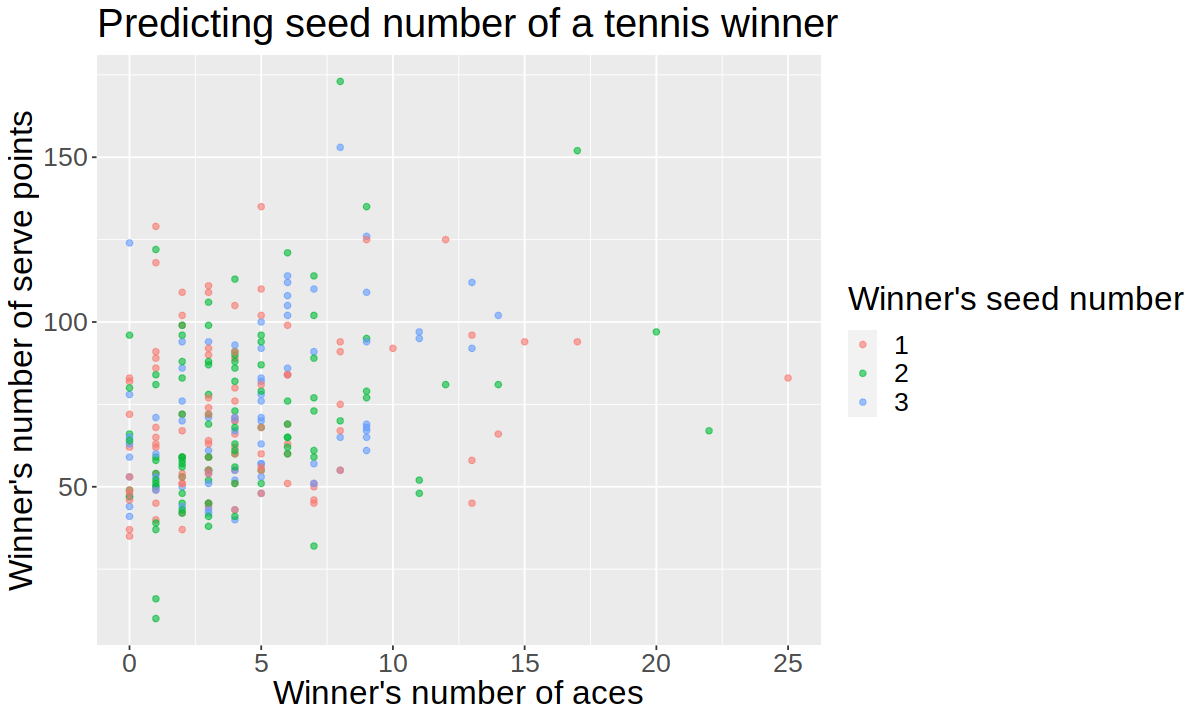

In [8]:
# Create a scatter plot of winner's number of serve points versus number of aces,
# Label the points with winner's seed number
atp_plot <- final_atp_data |>  
    ggplot(aes(x = w_ace, 
               y = w_svpt, 
               colour = winner_seed)) +
    geom_point(alpha = 0.6) +
    labs(x = "Winner's number of aces",
         y = "Winner's number of serve points",
         colour = "Winner's seed number") +
    ggtitle("Predicting seed number of a tennis winner") +
    theme(text = element_text(size = 20))
options(repr.plot.width = 10, repr.plot.height = 6)
atp_plot

This R code is creating a scatter plot using the `ggplot2` package to visualize the relationship between the winner's number of aces (`w_ace`) and the winner's number of serve points (`w_svpt`). The points in the scatter plot are colored based on the winner's seed number (`winner_seed`), and each point is labeled with the respective winner's seed number. 

Upon breaking down the code and interpreting the resulting scatter plot:

Explanation of the code:

‘final_atp_data’ is the data frame (or tibble) containing information about tennis matches, and it is being used as the data source for the plot.

‘ggplot(aes(...))’: sets up the basic structure of the plot. It specifies the variables for the x-axis (`w_ace`), y-axis (`w_svpt`), and the color of points (`winner_seed`).

‘geom_point(alpha = 0.6)’: adds points to the plot, and the `alpha` parameter controls the transparency of the points, making it easier to see overlapping points.

‘labs(...)’: sets the labels for the x-axis, y-axis, and color legend.

‘ggtitle(...)’: sets the title of the plot.

‘theme(text = element_text(size = 20))’: adjusts the text size in the plot to make it more readable.

The resulting scatter plot visualizes the relationship between the number of aces and the number of serve points for tennis winners. Each point on the plot represents a tennis match, and the color of the point corresponds to the winner's seed number. The alpha parameter (transparency) is used to make overlapping points more distinguishable.

The plot provides an overview of the distribution of points and allows for an initial assessment of any patterns or trends between the variables. 




In [9]:
# Set the seed
set.seed(3456) 

# Create the 25/75 split of the training data into training and validation
atp_split <- initial_split(final_atp_data, prop = 0.75, strata = winner_seed)
atp_train <- training(atp_split)
atp_test <- testing(atp_split)


This code sets the seed for reproducibility and then splits the final ATP tennis dataset into training and testing sets using a 75/25 split, allowing for the evaluation of model performance on unseen data. The use of ‘strata’ ensures that the distribution of ‘winner_seed’ levels is maintained in both the training and testing sets.


In [10]:
# Standardize the recipe
atp_recipe <- recipe(winner_seed ~ w_ace + w_svpt, data = atp_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

This code is creating a recipe for modeling the ‘winner_seed’ variable based on the predictor variables ‘w_ace’ and ‘w_svpt’ in the ATP tennis training dataset (‘atp_train’). The recipe includes steps for scaling and centering the predictor variables. Scaling will help improve the performance and convergence of the model. 


In [11]:
# Create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

The code is creating a model specification for a k-nearest neighbors (kNN) classification model using the ‘kknn’ package. 


In [12]:
# Perform cross-validation
atp_vfold <- vfold_cv(atp_train, v = 5, strata = winner_seed)

This code is creating cross-validation folds for the ATP tennis training dataset (‘atp_train’) using the ‘vfold_cv’ function from the ‘tidymodels’ framework. Cross-validation is a technique used to assess the performance of a predictive model by partitioning the data into multiple subsets (folds), training the model on some of the folds, and evaluating it on the remaining folds. This process is repeated, and the performance metrics are averaged over the folds to provide a more robust estimate of model performance.


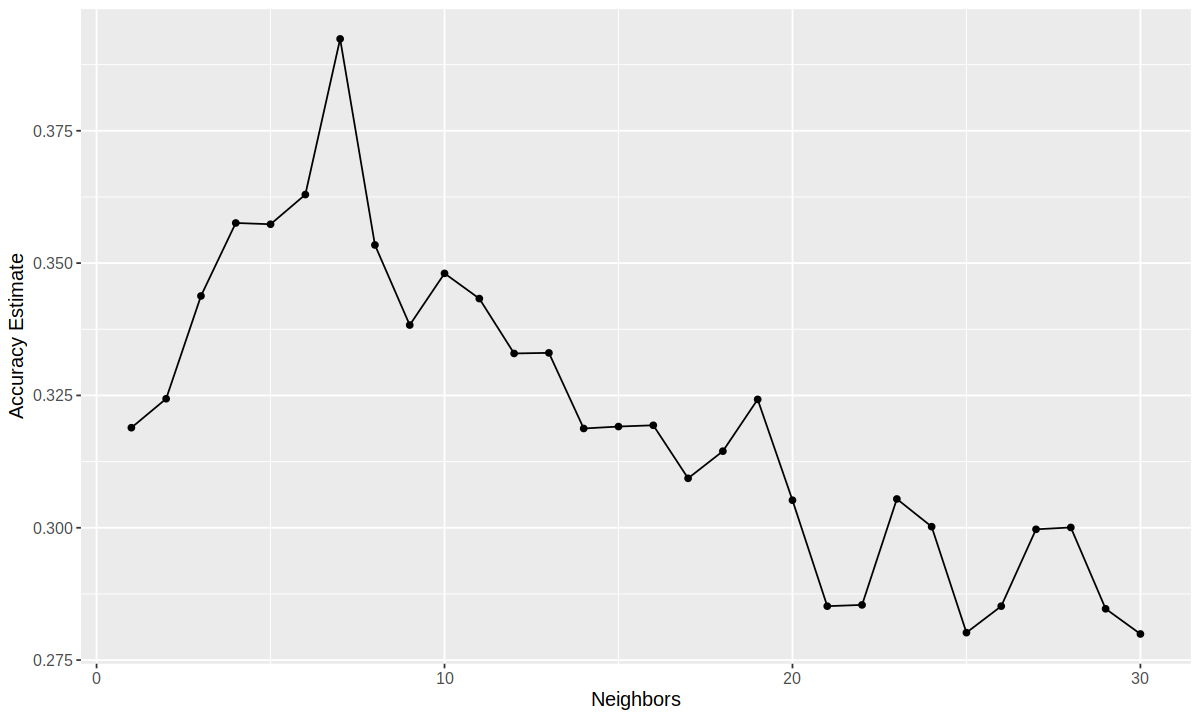

In [13]:
# Select the number of neighbors
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results <- workflow() |>
  add_recipe(atp_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = atp_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
accuracy_vs_k

In [14]:
# Select the number of neighbors to K = 7 due to its highest accuracy
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
  set_engine("kknn") |>
  set_mode("classification")

In [15]:
# Fit the knn model
knn_fit <- workflow() |>
  add_recipe(atp_recipe) |>
  add_model(knn_spec) |>
  fit(data = atp_train)

In [16]:
# Get predictions on the validation data
atp_test_predictions <- predict(knn_fit, atp_test) |>
  bind_cols(atp_test)

In [17]:
# compute the accuracy
atp_test_predictions |>
  metrics(truth = winner_seed, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric  .estimator .estimate
1 accuracy multiclass 0.3478261

In [18]:
# Create the confusion matrix for the predictor,
# Show the table of predicted labels and correct labels
confusion <- atp_test_predictions |>
             conf_mat(truth = winner_seed, estimate = .pred_class)
confusion

          Truth
Prediction  1  2  3
         1  8 10  7
         2  7  7  3
         3 10  8  9

Calculate Accuracy using the confusion matrix:

Accuracy = (8+7+9)/(8+10+7+7+7+3+10+8+9) = 0.3478

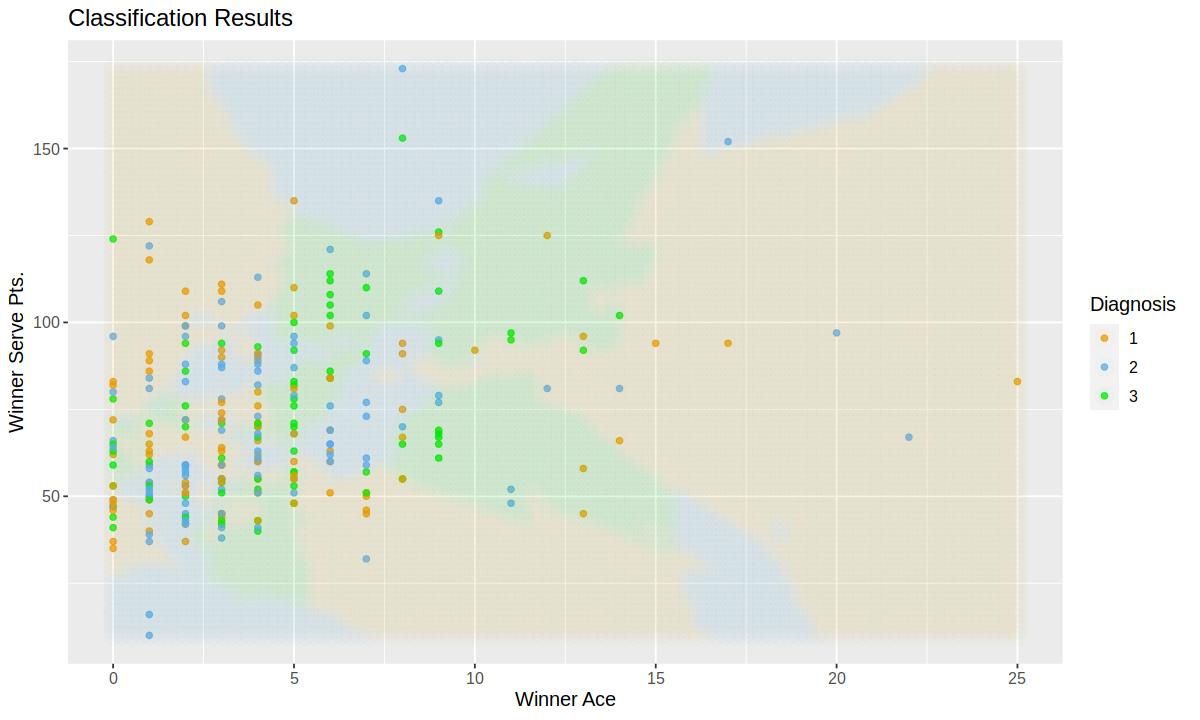

In [20]:
# Scatter plot of where background color indicates the decision of the classifier

are_grid <- seq(min(final_atp_data$w_ace), 
                max(final_atp_data$w_ace), 
                length.out = 100)
smo_grid <- seq(min(final_atp_data$w_svpt), 
                max(final_atp_data$w_svpt), 
                length.out = 100)
asgrid <- as_tibble(expand.grid(w_ace = are_grid, 
                                w_svpt = smo_grid))

# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(knn_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) |> 
  rename(winner_seed = .pred_class)

# plot:
# 1. the colored scatter of the original data
# 2. the faded colored scatter for the grid points
atpclass_plot <-
  ggplot() +
  geom_point(data = final_atp_data, 
             mapping = aes(x = w_ace, 
                           y = w_svpt, 
                           color = winner_seed), 
             alpha = 0.75) +
  geom_point(data = prediction_table, 
             mapping = aes(x = w_ace, 
                           y = w_svpt, 
                           color = winner_seed), 
             alpha = 0.02, 
             size = 5) +
  labs(color = "Diagnosis", 
       x = "Winner Ace", 
       y = "Winner Serve Pts.") +
    ggtitle("Classification Results")+
  scale_color_manual(values = c("orange2", "steelblue2", "green2")) +
  theme(text = element_text(size = 12))

atpclass_plot

METHODS:

We’ll predict seed number of a winner using two numerical variables: winner’s number of aces and winner's number of serve points.

Firstly, we read the dataset from a url so it can be seen without downloading locally. To clean and wrangle, we select columns that will be used in our prediction: surface, w_ace, w_pvpt and winner_seed. As we predict the top 3 seed numbers, we filter for seed numbers (=<3), filter clay as the type of surface, and remove all NA values. With our final dataset, we summarize values into useful tables. Next, we split the data into training set and test set so the classifier is built based on the training set and later used to predict data in the test set. Finally, we visualize the data by creating a scatter plot with winner’s number of aces and winner’s number of serve points on each axis, and different colored seed numbers for differentiation. Labels of axes, legend, and plot title are also added to make effective visualizations.

DISCUSSIONS:

With our analysis, we have a visualization demonstrating the relationship between the seed number of a tennis player, aces achieved by the winner, and serve points received by the winner on clay ground. We have picked the ideal classifier neighbour number as well, being K=7 using KNN classification, and produced a graph showing the K-nearest neighbour with the highest prediction accuracy. We also produced a graph that shows the predicted and classified seed numbers of the points in the data. The accuracy of our predictor however is not high due to the natural traits in the data. According to the tennis rules, players with similar skills are placed at opposite ends of seed numbers and players with differences in skill have similar seed numbers to ensure top players don’t face each other in early tournaments knocking out good players (Cooper, 2019). Thus, in the visualization of the classification (last graph) same colour (same class/seed number) is placed at generally opposite areas of the graph. Those with the lowest winner ace and highest winner ace are classified as the same seed type for them to face each other off. Another natural trait of the data that could have affected the accuracy of our model is the possibility that the seed number could have been inaccurately assigned from the beginning and or players played better in game compared to their initial seed ranking. Overall, using our data and based on game rules, we concluded that there was no linear relationship between w_ace, w_svpt, and winner_seed but there is fairly high correlation. By looking at the last graph, our analysis can verify the accuracy of seed assignments and the method used to predict the seed, to a certain extent. Since generally same classes are at opposite ends or areas of the graph, we concluded that the seed number determined for players pre-game are generally accurate and based on skill (w_svpt, w_ace). However as the accuracy of our predictor is not very high it still leads to further questions regarding the accuracy of the methods used to predict winner seed and if it actually reflects player skill  (based on serve points and aces). Our set of data can also be compared to a similar set where data is filtered to a different surface, and that can be taken to see if surfaces affect the performance of a player (eg. if a player’s performance fails to reflect the skill expected for someone with high/low seed due to the surface they played on). Overall, we hope the results will draw more insight and lead to further research about the accuracy of current seed prediction methods for tournaments and if it actually reflects player skill.
Citation: Cooper J. (2019 Nov. 4) Seeding in Competitive Tennis Tournaments [Blog post] Retrieved from https://www.liveabout.com/definition-of-seeding-3207821


OUTCOMES AND SIGNIFICANCE:

With our analysis, we’ll have a clear visualization demonstrating the relationship between the seed number of a tennis player, aces achieved by the winner, and serve points received by the winner on clay ground. We can classify the “overall seed” of winners who obtain a certain number of aces and serve points. Our data can verify the accuracy of seeds (how accurately does seed reflect player skill) based on whether a higher seed obtains more aces and serve points. If it reflects that winner seed assignment is inaccurate, it could lead to innovation in seed prediction. Since higher seed players are better, we can also draw explanations to questions like: “ If better players (higher seed) generally get more aces/serve points.” Our set of data can also be compared to a similar set where data is filtered to a different surface, and that can be taken to see if surfaces affect the overall study of the example questions above. Overall, we hope the results will draw more insight for future questions regarding relationships between winner seed and winner statistics.